# Tutorial 1 -- Linear Regression

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
from sklearn.linear_model import LinearRegression

## 1. Single variable

In [89]:
df1 = pd.read_csv("1-home-price-train.csv")
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price (USD)')

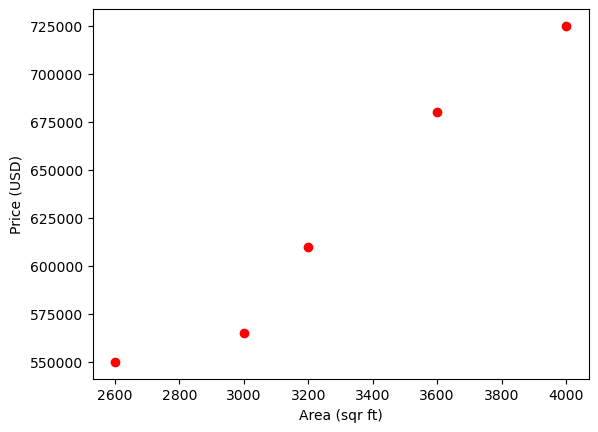

In [90]:
%matplotlib inline

plt.scatter(df1.area, df1.price, color="red")
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price (USD)")

In [91]:
model = LinearRegression()

model.fit(df1[["area"]].values, df1.price)

LinearRegression()

In [92]:
model.coef_

array([135.78767123])

In [93]:
model.intercept_

180616.43835616432

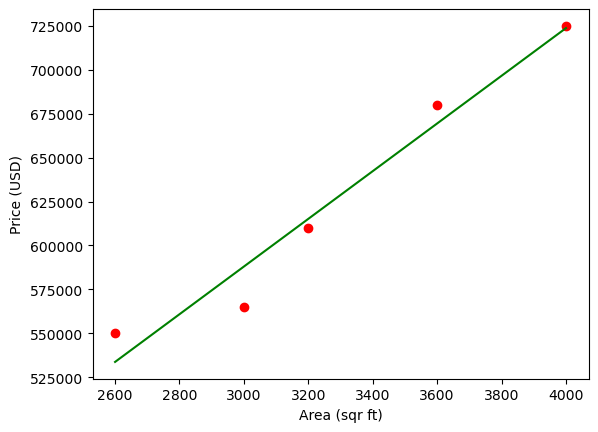

In [94]:
%matplotlib inline
plt.xlabel("Area (sqr ft)")
plt.ylabel("Price (USD)")
plt.scatter(df1.area, df1.price, color="red")
plt.plot(df1.area, model.predict(df1[["area"]].values), color="g")

In [95]:
target_area = 3300
prediction_for_target_area = model.predict(np.array([[target_area]]))[0]
print(prediction_for_target_area)

628715.7534246575


In [96]:
135.78767123*3300 + 180616.43835616432

628715.7534151643

In [97]:
df2 = pd.read_csv("1-home-price-predict.csv")
df2.tail(3)

,area
6,4000
7,4500
8,5000


In [98]:
model.predict(df2[["area"]]) # get a warning like "UserWarning: X has feature names, but LinearRegression was fitted without feature names warnings.warn"

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([316404.10958904, 384297.94520548, 452191.78082192, 520085.61643836,
       587979.45205479, 655873.28767123, 723767.12328767, 791660.95890411,
       859554.79452055])

In [99]:
new_prediction = model.predict(df2[["area"]].values)
new_prediction

array([316404.10958904, 384297.94520548, 452191.78082192, 520085.61643836,
       587979.45205479, 655873.28767123, 723767.12328767, 791660.95890411,
       859554.79452055])

In [100]:
df2["prices"] = new_prediction
df2

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2000,452191.780822
3,2500,520085.616438
4,3000,587979.452055
5,3500,655873.287671
6,4000,723767.123288
7,4500,791660.958904
8,5000,859554.794521


In [101]:
# df2.to_csv("home_price_predict.csv", index=False)

### 1.1 Save model using `dump` pickle (I)

In [102]:
import pickle

# this is binary document
with open("1-model-pickle", "wb") as fout:
    pickle.dump(model, fout)

In [103]:
# reuse this model
with open("1-model-pickle", "rb") as fin:
    new_model = pickle.load(fin)

In [104]:
print(new_model, model.coef_, model.intercept_)

LinearRegression() [135.78767123] 180616.43835616432


In [105]:
# make new prediction (as shown in df2 above)

new_model.predict([[3000], [5000]])

array([587979.45205479, 859554.79452055])

In [106]:
# now you can share the `1-model-pickle` file to colleagues

### 1.2 Save model using `dumps` in pickle (II)

In [107]:
fout = pickle.dumps(model)
model2 = pickle.loads(fout)
print(model2, model2.coef_, model2.intercept_)

LinearRegression() [135.78767123] 180616.43835616432


### 1.3 Save model using `joblib` in sklearn

In [143]:
# joblib is more efficient than pickle objects 
# that carry large numpy arrays internally as is often the case for 
# fitted scikit-learn estimators

import joblib

In [109]:
joblib.dump(model, "1-model-joblib.pkl")

['1-model-joblib.pkl']

In [110]:
model_joblib = joblib.load("1-model-joblib.pkl")

In [111]:
print(model_joblib, model_joblib.coef_, model_joblib.intercept_)

LinearRegression() [135.78767123] 180616.43835616432


## 2. Multivariate Regression

In [112]:
df3 = pd.read_csv("1-home-price-train2.csv")
df3.head(3)

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000


In [113]:
# price = m1*area + m2*bedrooms + m3*age + b
# price is a `dependent variable`
# area, bedrooms, and age are `independent variables (features)`
# m1, m2, and m3 are coefficients, and b is the intercept
#
# y = m1x1 + m2x2 + m3x3 + b

In [114]:
# We need two steps:
# - data processing: handle NA values
# - linear regression using multiple variables

In [115]:
import math
median_bedroom = math.floor(df3.bedroom.median())
median_bedroom

3

In [116]:
df3.bedroom.fillna(median_bedroom) # process the NA value

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedroom, dtype: float64

In [117]:
df3.bedroom = df3.bedroom.fillna(median_bedroom)
df3

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [118]:
reg = LinearRegression().fit(df3[["area", "bedroom", "age"]], df3.price)

In [119]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [120]:
reg.intercept_

383725.0

In [121]:
# new prediction 1
target = 3000, 3, 40
price = reg.predict(np.array([target]))[0]
price

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


444399.9999999999

In [122]:
# new prediction 2

price = reg.predict([[2500, 4, 5]])[0]
price

/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


588625.0

In [123]:
#x = np.array([['area', 'bedroom', 'age'], [2500, 4, 5]])
#print(x)
#price = reg.predict(x.values)[0]

## 3. Data for training and validating

If you have enough data, you can use a large amount of data for training (say 70%) and the left data (30%) for validation.


In [124]:
df3 = pd.read_csv("1-car-model-co2.csv")
df3.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [125]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [126]:
# checking for any null values
df3.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [127]:
df3.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

<Axes: >

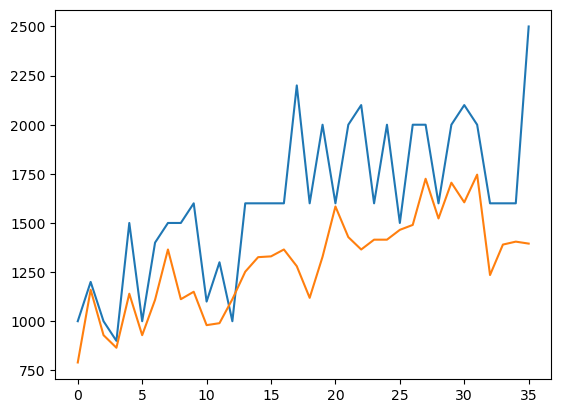

In [128]:
df3["Volume"].plot()
df3["Weight"].plot()

/var/folders/by/lywypyc12z57hhdgj6x1nmvm0000gn/T/ipykernel_34517/3131656625.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), cmap="coolwarm", annot=True)


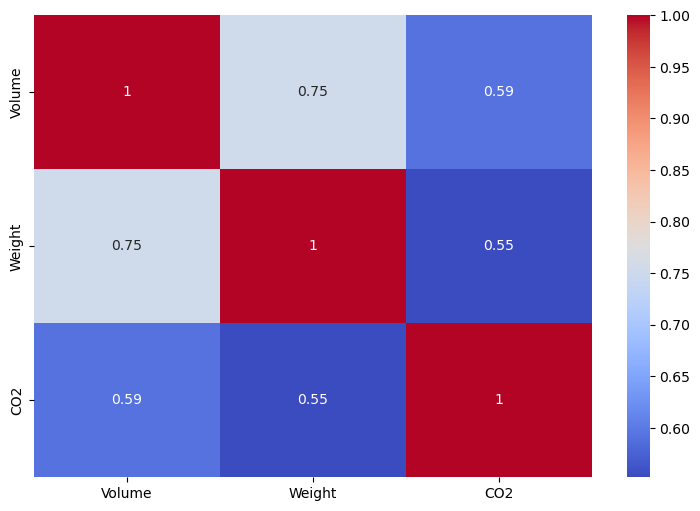

In [144]:
import seaborn as sns

plt.figure(figsize=(9,6))
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True)
plt.show()

### 3.1 All data for training

In [130]:
# make a list of the independent values and call this variable X.
# Put the dependent values in a variable called y.

X = df3[["Weight", "Volume"]]
Y = df3[["CO2"]]

In [131]:
reg = LinearRegression()

In [132]:
reg.fit(X, Y)

LinearRegression()

In [133]:
print(reg.coef_, '\n')
print(reg.intercept_)

[[0.00755095 0.00780526]] 

[79.69471929]


In [134]:
test_data = np.array([2300, 1200]) # weight and volumn
predict_co2 = reg.predict([test_data])[0]
print(predict_co2)

[106.42820705]


/Users/yonglei/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3.2 Split data for training and testing

In [135]:
X = df3[["Weight", "Volume"]].values
Y = df3[["CO2"]].values

In [171]:
# Split data 80% for training and 20% for testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [161]:
# Train the modell for linear prediction

from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# creating the lienar regression model
model = LinearRegression()

# fit linear regression model
model.fit(X_train, Y_train)

LinearRegression()

In [162]:
model.score(X_train, Y_train)

0.2821422900829408

In [173]:
model.score(X_test, Y_test)

0.3658070246365972

In [163]:
# Prediction table of actual prices vs predicted values from model

# use model to make prediction
Y_predict = model.predict(X_test)

In [164]:
Y_test_flat = Y_test.flatten()
Y_predict_flat = Y_predict.flatten()
df4 = pd.DataFrame({"Actual_Price":Y_test_flat, "Predicted_Price":Y_predict_flat})
df4

,Actual_Price,Predicted_Price
0,117,105.188846
1,94,101.506169
2,99,101.374037
3,115,106.000009
4,99,105.855207
5,97,101.352920
6,99,96.660580
7,95,95.733576
8,101,98.459081
9,114,105.164109


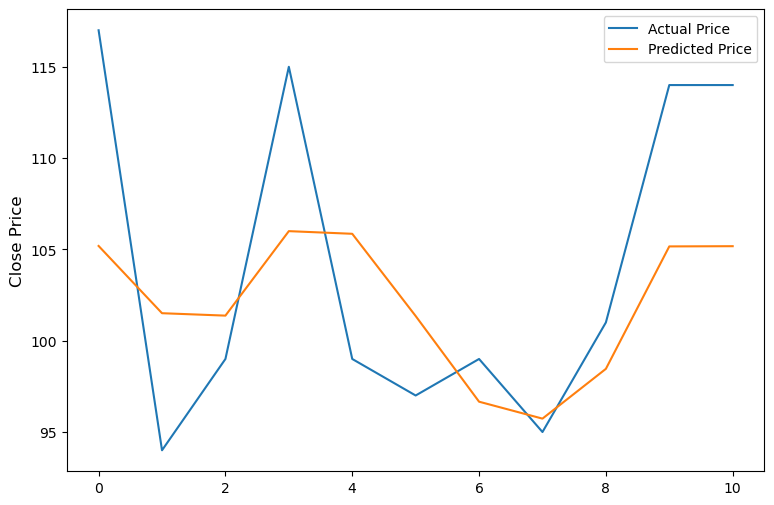

In [165]:
plt.figure(figsize=(9,6))
plt.plot(df4)
plt.ylabel("Close Price", fontsize=12)
plt.legend(["Actual Price", "Predicted Price"])
plt.show()

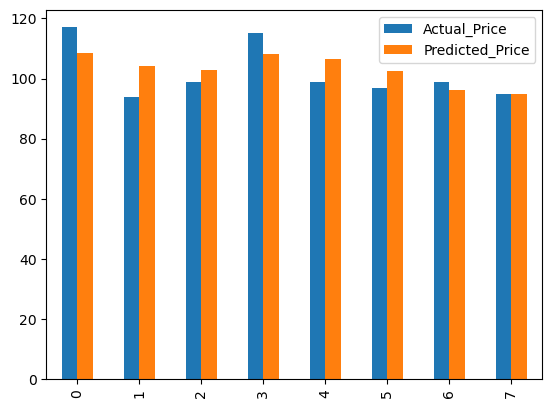

In [153]:
# graph plot for Actual prices and Predicted prices

graph = df4.head(8)
graph.plot(kind='bar')
plt.show()